In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emotion_final.csv")

In [4]:
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


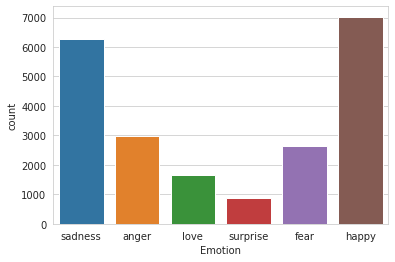

In [5]:
import seaborn as sns

sns.set_style("whitegrid")
sns.countplot(x="Emotion",data = df)

In [6]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def text_processing(text: str):
    stpwrds = stopwords.words("english")
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = "".join(no_punctuation)
    return " ".join([word for word in no_punctuation.split() if word.lower() not in stpwrds])

In [8]:
df["PreText"] = df["Text"].apply(text_processing)
df.head()

,Text,Emotion,PreText
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [9]:
df = df[["PreText", "Emotion"]]

In [10]:
df.head()

,PreText,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [11]:
emotion_encode = pd.get_dummies(df["Emotion"])
df = df[["PreText"]]

In [12]:
df = pd.concat([df, emotion_encode], axis=1)
df.head()

,PreText,anger,fear,happy,love,sadness,surprise
0,didnt feel humiliated,0,0,0,0,1,0
1,go feeling hopeless damned hopeful around some...,0,0,0,0,1,0
2,im grabbing minute post feel greedy wrong,1,0,0,0,0,0
3,ever feeling nostalgic fireplace know still pr...,0,0,0,1,0,0
4,feeling grouchy,1,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [14]:
X = df["PreText"].values
y = df.drop("PreText", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
final_X = X_test.copy()

In [15]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [16]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [18]:
model = Sequential()

model.add(Dense(units=22000, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=8000, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=2000, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=6, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100


In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print("Test Accuracy : ", model_score[1])

In [ ]:
df_pred = model.predict(X_test)
df_pred

In [ ]:
emotion = ['anger', 'fear', 'happy', 'love', 'sadness','suprised']

In [ ]:
pred_emotion = pd.DataFrame(df_pred.argmax(axis=1))
pred_emotion.rename(columns = {0:"Emotion"}, inplace=True)
pred_emotion["Emotion"] = [emotion[ind] for ind in pred_emotion["Emotion"].tolist()]

In [ ]:
pred_emotion.head()

In [ ]:
y_emotion = pd.DataFrame(y_test.argmax(axis=1))
y_emotion.rename(columns = {0:"Emotion_Test"}, inplace=True)
y_emotion["Emotion_Test"] = [emotion[ind] for ind in y_emotion["Emotion_Test"].tolist()]

In [ ]:
y_emotion.head()

In [ ]:
pd.concat([pred_emotion, y_emotion], axis=1)

## User Text Emotion detection

In [ ]:
text = [input("Enter Text : ")]

In [ ]:
text = text_processing(text)
text = tfidf.transform(vect.transform([text])).toarray()
text

In [ ]:
emotion[model.predict(text).argmax(axis=1)[0]]